In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [28]:
def im_stats(img):
    (row , col, depth)= img.shape
    print (" Image has",row,"rows,",col,"cols and",depth,"depth")
    
    return (row, col, depth)

def disp_img(img):
    plt.figure(figsize=(18, 18))
    plt.imshow(img)

def img_blur(img, kernel_size= (5,5), rep=1):
    for i in range(rep):
        img = cv2.GaussianBlur(img, kernel_size, 0)
    return img

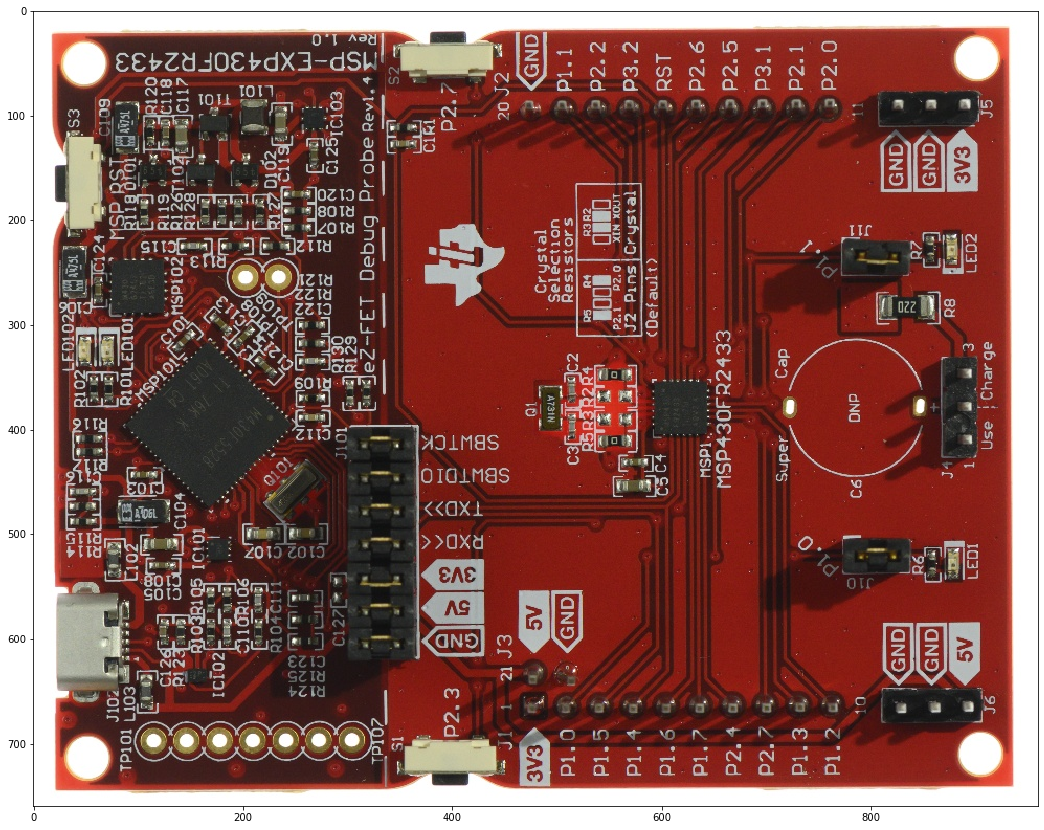

In [34]:
pcb_red = cv2.imread('orig_red.jpg')
pcb_red = cv2.cvtColor(pcb_red, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 18))
plt.imshow(pcb_red)

In [38]:
pcb_redblur = img_blur(pcb_red)
#disp_img(pcb_redblur)

In [84]:
scale_fac = 4

temp_r, temp_c, temp_d = im_stats(pcb_red)
ds_pcb_red = cv2.resize(pcb_red, ( temp_c//scale_fac, temp_r//scale_fac ))
temp_mat_red = ds_pcb_red
temp_r_red, temp_c_red, temp_d_red = im_stats(temp_mat_red)

 Image has 760 rows, 960 cols and 3 depth
 Image has 190 rows, 240 cols and 3 depth


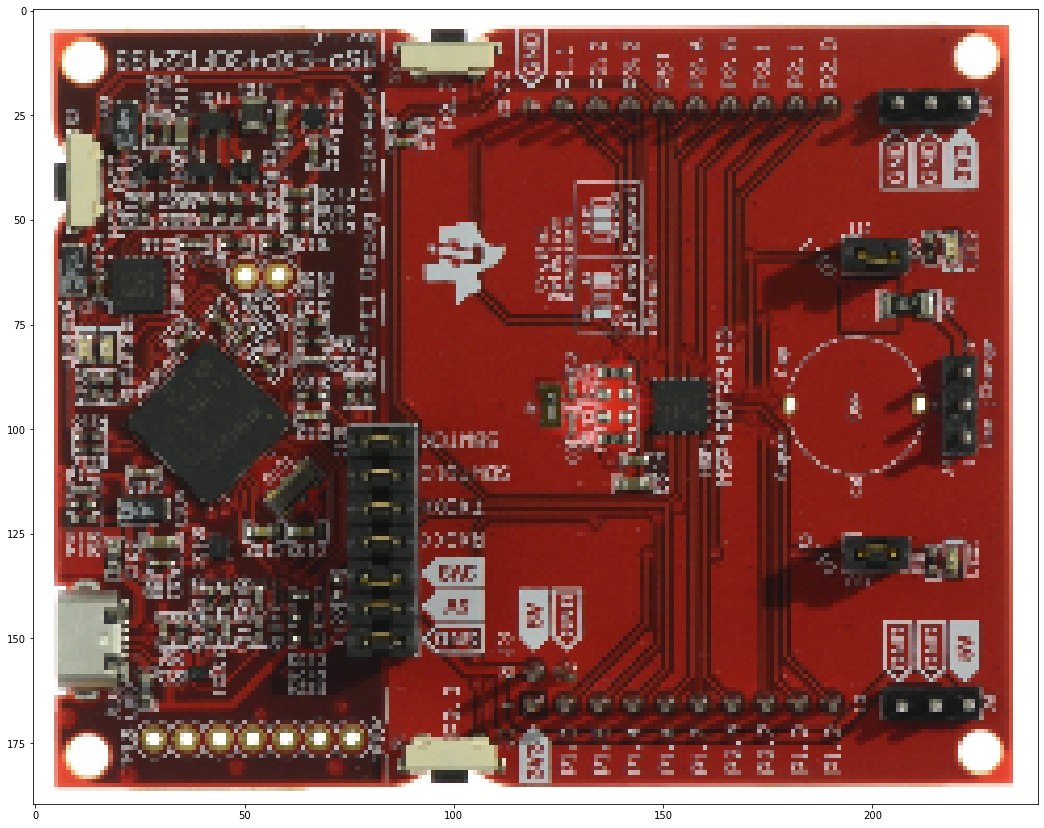

In [85]:
disp_img(ds_pcb_red)

In [86]:
item = 127
for i in range(temp_r_red):
    for j in range(temp_c_red):
        for k in range(temp_d_red):
                
                if (temp_mat_red[i][j][0] > item and temp_mat_red[i][j][1] > item and temp_mat_red[i][j][2] > item):
                    
                    temp_mat_red[i][j][k] = 255 if (temp_mat_red[i][j][k] ** (temp_mat_red[i][j][k]/item))>255 else (temp_mat_red[i][j][k] ** (temp_mat_red[i][j][k]/item))
                
                else:
                    temp_mat_red[i][j][k] = 0


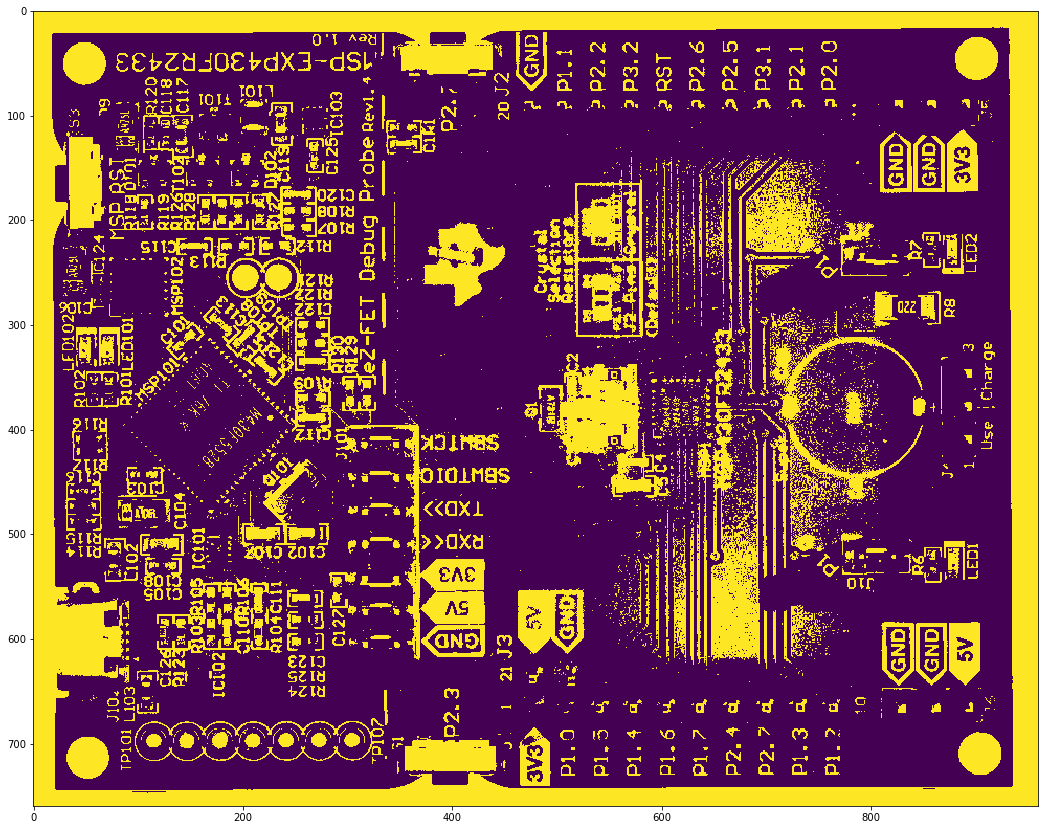

In [95]:
pcb_red = cv2.cvtColor(pcb_red, cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(pcb_red, 127, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 255, 5) 
disp_img(thresh)

In [96]:
#disp_img(temp_mat_red)

114


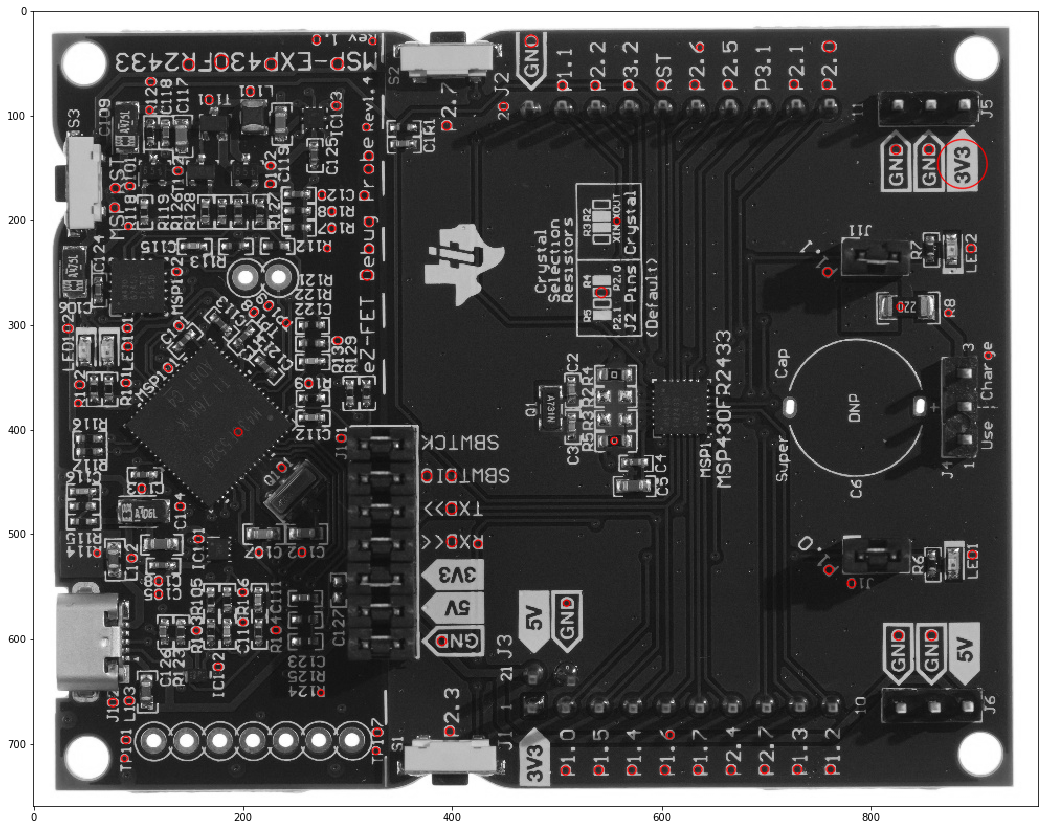

In [97]:
detector = cv2.SimpleBlobDetector_create()

keypoints = detector.detect(thresh)
print(len(keypoints))

imageKeyPoints = cv2.drawKeypoints(pcb_red, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

disp_img(imageKeyPoints)